In [25]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [26]:
df = pd.read_csv('troop_movements.csv')

In [27]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-02-06 16:02:06,1,at-at,resistance,5,5,9,1,Haruun Kal
1,2024-02-06 16:02:05,2,at-at,empire,7,6,8,9,Cerea
2,2024-02-06 16:02:04,3,tie_silencer,empire,7,9,2,6,Ryloth
3,2024-02-06 16:02:03,4,tie_fighter,resistance,1,6,1,6,Umbara
4,2024-02-06 16:02:02,5,tie_silencer,empire,1,9,7,5,Shili


In [28]:
num_empire = len(df[df.empire_or_resistance == "empire"])
num_resistance = len(df[df.empire_or_resistance == "resistance"])
empire_v_resistance = pd.DataFrame([["empire", num_empire],["resistance", num_resistance]])
empire_v_resistance.columns = ['empire_or_resistance', 'count']
empire_v_resistance

,empire_or_resistance,count
0,empire,471
1,resistance,529


In [29]:
homeworlds = np.array(df.homeworld)
unique, counts = np.unique(homeworlds, return_counts=True)
homeworlds_count = np.array([unique, counts]).T
homeworlds = pd.DataFrame(homeworlds_count)
homeworlds.columns = ['homeworld','count']
homeworlds

,homeworld,count
0,Alderaan,30
1,Aleen Minor,17
2,Bestine IV,23
3,Cerea,19
4,Champala,26
5,Chandrila,32
6,Concord Dawn,27
7,Corellia,33
8,Dagobah,21
9,Dathomir,39


In [30]:
unit_types = np.array(df.unit_type)
unique, counts = np.unique(unit_types, return_counts=True)
unit_types_count = np.array([unique, counts]).T
unit_types = pd.DataFrame(unit_types_count)
unit_types.columns = ['unit_type','count']
unit_types

,unit_type,count
0,at-at,105
1,at-st,123
2,resistance_soldier,138
3,stormtrooper,125
4,tie_fighter,130
5,tie_silencer,138
6,unknown,117
7,x-wing,124


In [31]:
is_resistance = []
in_resistance = np.array(df.empire_or_resistance)

for i in in_resistance:
    if i == 'empire':
        is_resistance.append(False)
    elif i =='resistance':
        is_resistance.append(True)
df = df.assign(is_resistance=is_resistance)
df
        

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-02-06 16:02:06,1,at-at,resistance,5,5,9,1,Haruun Kal,True
1,2024-02-06 16:02:05,2,at-at,empire,7,6,8,9,Cerea,False
2,2024-02-06 16:02:04,3,tie_silencer,empire,7,9,2,6,Ryloth,False
3,2024-02-06 16:02:03,4,tie_fighter,resistance,1,6,1,6,Umbara,True
4,2024-02-06 16:02:02,5,tie_silencer,empire,1,9,7,5,Shili,False
...,...,...,...,...,...,...,...,...,...,...
995,2024-02-06 15:45:31,996,at-at,resistance,10,3,8,1,Glee Anselm,True
996,2024-02-06 15:45:30,997,resistance_soldier,empire,7,2,10,5,Toydaria,False
997,2024-02-06 15:45:29,998,x-wing,resistance,2,3,4,4,Ryloth,True
998,2024-02-06 15:45:28,999,at-st,empire,8,8,5,10,Sullust,False


Text(0.5, 1.0, 'Character Count by Empire or Resistance')

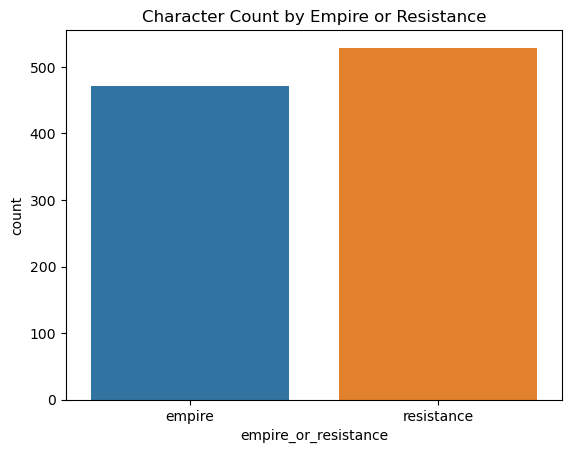

In [32]:
sns.barplot(empire_v_resistance, x="empire_or_resistance", y="count").set_title('Character Count by Empire or Resistance')

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import pickle

# sk.DecisionTreeClassifier 
X = df[['homeworld','unit_type']]
X_encoded = pd.get_dummies(X)
y = df['is_resistance'].to_frame()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=24)

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)
y_pred = model.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[ True False False False False False False False  True False  True False
 False False  True  True False  True False  True False  True  True False
 False  True False False False  True False  True  True  True  True False
  True  True False False  True  True  True False  True False False False
 False False  True  True False False  True  True False False False  True
  True False  True False False False  True False  True  True False False
 False  True False False False False False False  True  True False  True
 False False False False False False  True  True  True False  True False
 False  True  True False  True  True  True False False  True  True  True
 False  True False False  True  True False  True  True False False  True
 False False  True  True False  True  True False False  True False False
 False  True  True False  True  True False  True False False  True False
  True  True False  True False False False  True False  True  True  True
  True  True  True False False  True False  True Fa

NameError: name 'my_plot' is not defined

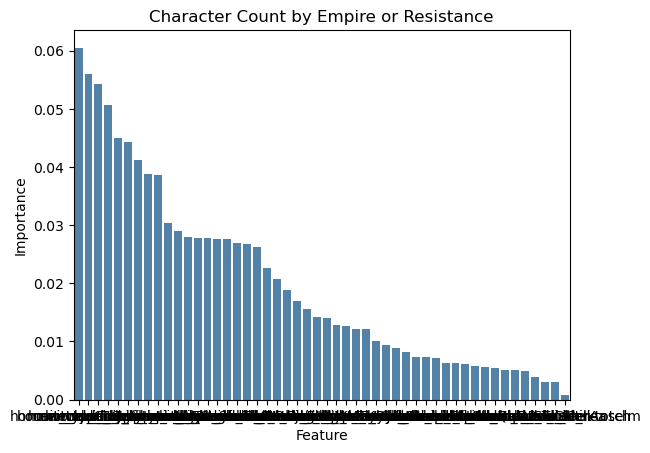

In [34]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
feature_importances = sns.barplot(data=feature_importances, x="Feature", y="Importance", color="steelblue", order=feature_importances.sort_values('Importance',ascending = False).Feature).set_title('Character Count by Empire or Resistance')
x_ticks = my_plot.get_xticklabels()
feature_importances.set_xticklabels(x_ticks, rotation=90)
feature_importances

In [ ]:
real_data = pd.read_csv('troop_movements10m.csv')

In [ ]:
real_data.head(5)

In [ ]:
real_data.unit_type = real_data.unit_type.map(lambda x: 'unknown' if x == 'invalid_unit' else x)
print(real_data.unit_type)

In [ ]:
print(real_data)

In [53]:
real_data = real_data.ffill()

In [54]:
real_data

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-13 17:33:18,1,at-st,2.0,8.0,1,1,Glee Anselm
1,2023-06-13 17:33:17,2,tie_silencer,4.0,4.0,0,1,Trandosha
2,2023-06-13 17:33:16,3,at-at,0.0,3.0,6,1,Corellia
3,2023-06-13 17:33:15,4,tie_silencer,6.0,1.0,6,9,Shili
4,2023-06-13 17:33:14,5,tie_fighter,0.0,4.0,9,6,Muunilinst
...,...,...,...,...,...,...,...,...
9999995,2023-02-18 10:26:20,9999996,resistance_soldier,6.0,6.0,1,3,Troiken
9999996,2023-02-18 10:26:19,9999997,tie_silencer,8.0,6.0,2,0,Kashyyyk
9999997,2023-02-18 10:26:18,9999998,tie_fighter,7.0,7.0,6,4,Kashyyyk
9999998,2023-02-18 10:26:17,9999999,tie_fighter,6.0,6.0,8,8,Kalee


In [55]:
real_data.to_parquet('troop_movements10m.parquet')

In [56]:
import pandas as pd
clean_data = pd.read_parquet('troop_movements10m.parquet', engine = 'pyarrow')

In [57]:
clean_data.tail(5)

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
9999995,2023-02-18 10:26:20,9999996,resistance_soldier,6.0,6.0,1,3,Troiken
9999996,2023-02-18 10:26:19,9999997,tie_silencer,8.0,6.0,2,0,Kashyyyk
9999997,2023-02-18 10:26:18,9999998,tie_fighter,7.0,7.0,6,4,Kashyyyk
9999998,2023-02-18 10:26:17,9999999,tie_fighter,6.0,6.0,8,8,Kalee
9999999,2023-02-18 10:26:16,10000000,unknown,6.0,6.0,3,0,Skako


In [58]:
troop_model = pd.read_pickle('trained_model.pkl')

In [39]:
troop_model

DecisionTreeClassifier()

In [59]:
A = clean_data[['homeworld','unit_type']]
A_encoded = pd.get_dummies(A)
# b = df['is_resistance'].to_frame()

# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=24)
prediction = troop_model.predict(A_encoded)
prediction

array([ True, False, False, ..., False,  True, False])

In [60]:
clean_data = clean_data.assign(predictions=prediction)

In [61]:
clean_data.tail(5)

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld,predictions
9999995,2023-02-18 10:26:20,9999996,resistance_soldier,6.0,6.0,1,3,Troiken,False
9999996,2023-02-18 10:26:19,9999997,tie_silencer,8.0,6.0,2,0,Kashyyyk,True
9999997,2023-02-18 10:26:18,9999998,tie_fighter,7.0,7.0,6,4,Kashyyyk,False
9999998,2023-02-18 10:26:17,9999999,tie_fighter,6.0,6.0,8,8,Kalee,True
9999999,2023-02-18 10:26:16,10000000,unknown,6.0,6.0,3,0,Skako,False
